# **MNIST Project**

1. ### **Dataset Summary**
The MNIST dataset consists of 70,000 28x28 black-and-white images of handwritten digits extracted from two NIST databases. There are 60,000 images in the training dataset and 10,000 images in the validation dataset, one class per digit so a total of 10 classes, with 7,000 images (6,000 train images and 1,000 test images) per class. Half of the image were drawn by Census Bureau employees and the other half by high school students (this split is evenly distributed in the training and testing sets).

2.  ### **Supported Task**
image-classification: The goal of this task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.


## Get tha dataset

In [1]:
import sklearn.datasets

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False,parser = "auto")

### exploring and preparing the dataset

#### print your dataset to get insight

In [3]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

#### Split you data into data and labels (target)

In [4]:
X ,y = mnist["data"],mnist["target"]

In [5]:
import numpy as np
y = y.astype(np.uint8)

#### find the data shape using .shape function

In [6]:
X.shape

(70000, 784)

### Peek at one digit from the dataset

In [7]:
import matplotlib
import matplotlib.pyplot as plt

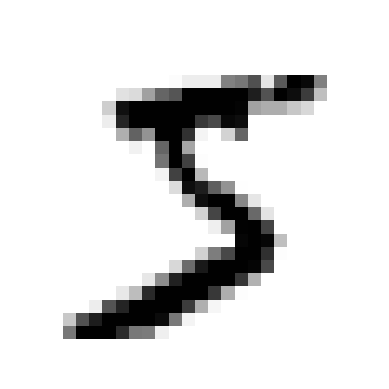

In [8]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

#### Split the data into train and test set

In [9]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

### Shuffling the training set

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

#### access the label of the above digit image

In [11]:
y[0]

5

### Training a Binary classifier


### SGD classifier

#### Create a SGD classifier

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5

In [14]:
sgd_clf.predict([some_digit])

array([ True])

## Performance measure

####  Measuring Accuracy Using Cross-validation

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

#### dumb classifier

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y = None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

#### find cross_val_score for the dumb classifier

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Confusion matrix

In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### find confusion matrix

In [20]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

## Precision and Recall

In [21]:
from sklearn.metrics import precision_score, recall_score,f1_score

#### find precision score

In [22]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

#### find recall score

In [23]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

#### find f1 score
***Notice that f1 score is harmonic mean between recall and precision***

In [24]:
f1_score(y_train_5,y_train_pred)

0.7325171197343846

# Precision/Recall Tradeof

#### use decision_function() and make prediction

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

#### Set the threshold to zero

In [26]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

#### Set the threshold to 200000

In [27]:
threshold = 200000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

#### To decide which threshold you want to use find decision scores for all instances

In [28]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                            method ="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

#### computing precision and recall for all possible thresholds using the precision_recall_curve()

In [29]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

#### plot precision and recall as functions of the threshold value using Matplotlib

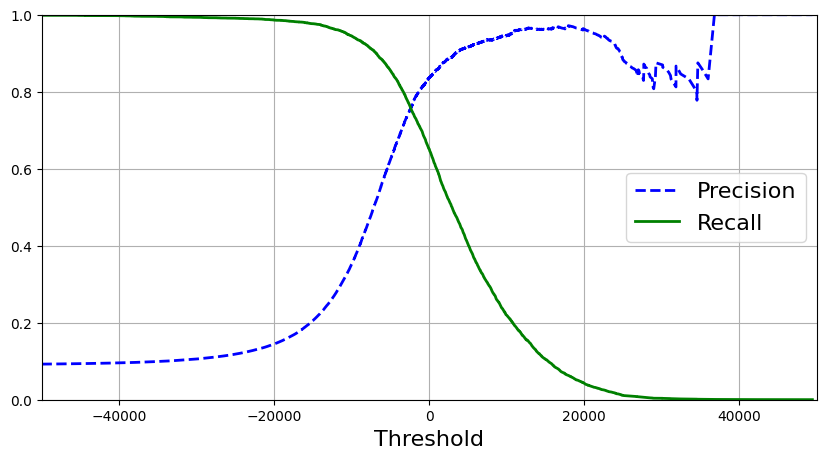

In [30]:
plt.figure(figsize=(10,5))

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

#### lets aim for 90%recall
#### try different threshold and see what will happen

#### precision score

In [31]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]
y_train_pred_90 = (y_scores >=threshold_90_precision)

In [32]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

#### recall score

In [33]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

# The ROC Curve

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#### plot the FPR against the TPR using Matplotlib

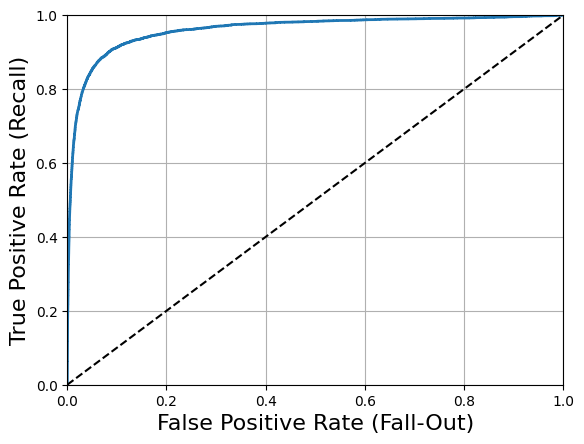

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plot_roc_curve(fpr,tpr)
plt.show()

#### computing the ROC AUC score

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,
                                   method="predict_proba")

In [39]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

#### plot ROC


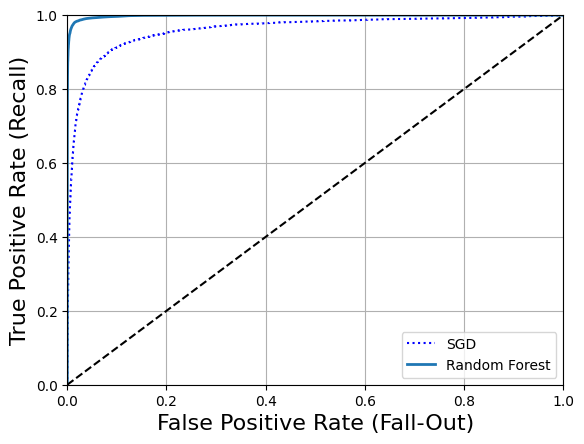

In [40]:

plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

#### find ROC AUC score for randomforestclassifier

In [41]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

#### SGDCClassifier with multiple calss

In [84]:
X ,y = mnist["data"],mnist["target"]

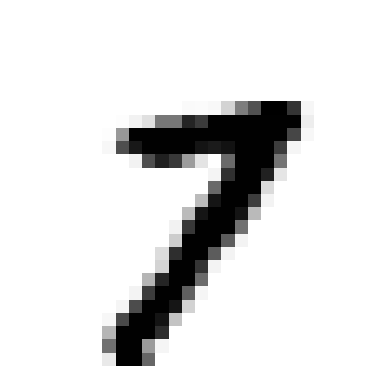

In [85]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[40000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [86]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [44]:
sgd_clf.fit(x_train,y_train )
sgd_clf.predict([some_digit])

array([7], dtype=uint8)

#### Call decision_function() method to return score for each instance

In [45]:
sgd_clf.decision_function([some_digit])

array([[-27550.00882733, -11688.46949827, -25631.38387548,
         -4634.43656935, -28516.98252896,  -7811.64977013,
        -29056.1401332 ,   8510.68668021,  -8607.4494705 ,
        -10242.56319965]])

#### find highest score

In [46]:
sgd_clf.decision_function([some_digit]).max()

8510.68668021335

#### list the target classes

In [47]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Find the the target class for 7

In [48]:
import numpy as np
np.argmax(sgd_clf.decision_function([some_digit]))

7

#### Force ScikitLearn to use one-versus-one

In [49]:
from sklearn.multiclass import OneVsOneClassifier

In [50]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [51]:
ovo_clf.predict([some_digit])

array([7], dtype=uint8)

#### find how many classifier OvO used

In [52]:
len(ovo_clf.estimators_)

45

#### Train  RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [54]:
forest_clf.fit(x_train,y_train)
forest_clf.predict([some_digit])

array([7], dtype=uint8)

#### call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class

In [55]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

#### Find accurcy using cross validation score ()

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
cross_val_score(sgd_clf, x_train,y_train,cv=3,scoring="accuracy")

array([0.78185, 0.8707 , 0.8613 ])

#### to get better accurcy try scaling input

In [58]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

## Error Analysis

#### Take a look at the confusion matrix

In [60]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [88]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred, )
conf_mx

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5595,    0,   12,    8,    9,   40,   31,    5,  222,    1],
       [   1, 6420,   45,   18,    3,   42,    5,    8,  191,    9],
       [  28,   23, 5226,   91,   71,   21,   78,   39,  372,    9],
       [  26,   18,  113, 5243,    0,  203,   27,   47,  388,   66],
       [  12,   14,   43,    9, 5238,   10,   33,   15,  319,  149],
       [  30,   19,   29,  149,   47, 4486,   81,   17,  498,   65],
       [  32,   21,   45,    1,   46,   83, 5551,    5,  134,    0],
       [  19,   10,   51,   24,   48,   10,    6, 5717,  176,  204],
       [  16,   67,   42,   89,    1,  123,   33,    7, 5426,   47],
       [  23,   20,   30,   57,  125,   38,    1,  181,  328, 5146]])

#### using Matplotlib’s matshow() function look at an image representation of the confusion matrix

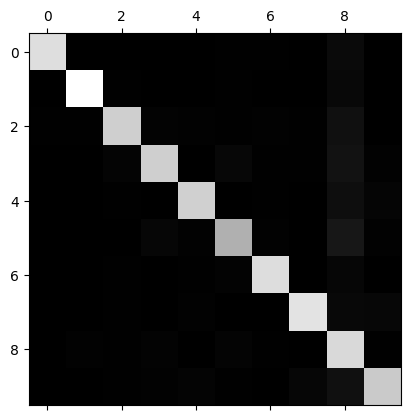

In [62]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### Dividing each value in the confusion matrix by the number of images in the corresponding class

In [63]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#### fill the diagonal with zeros to keep only the errors

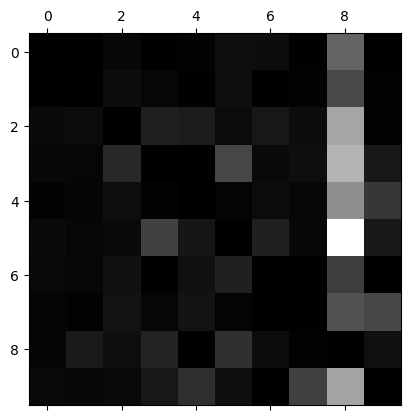

In [64]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

In [89]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

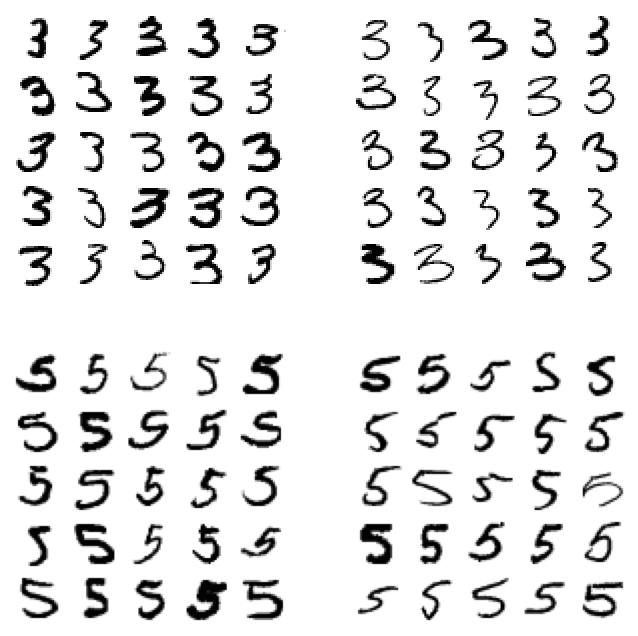

In [90]:
cl_a, cl_b = '3', '5'
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row= 5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row= 5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row= 5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row= 5)
plt.show()


## Multilabel Classification

#### creates a y_multilabel array containing two target labels for each digit image

In [91]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train == '1')
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)


KNeighborsClassifier()

#### find the prediction

In [92]:
knn_clf.predict([some_digit])

array([[ True, False]])

## Multioutput Classification


In [93]:
noise = np.random.randint(0, 100, (len(x_train), 784))
X_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
X_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

In [94]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])

#### Let’s take a peek at an image from the test set

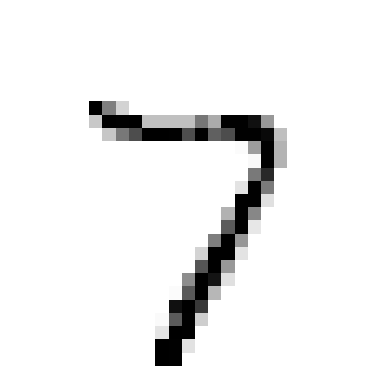

In [95]:
plot_digits(clean_digit)